In [79]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
# ------------------------------------------------ cleaning the data --------------------------------------------------------- #

df = pd.read_csv('validated.tsv', sep='\t')
# print(df.columns)
# print(df.shape)

# drop columns with more than 50% NAN values
na_threshold = df.isnull().mean() * 100
cols_to_drop = na_threshold[na_threshold > 50].index 
df = df.drop(columns=cols_to_drop)
# print(df.columns)

# droping NAN rows
# print(df.shape)
df = df.dropna()
df = df.reset_index(drop=True)
# print(df.shape)

rows , cols = df.shape
print(f"Number of Samples: {rows} \nNumber of Features: {cols} \n")
df.head()

Number of Samples: 56496 
Number of Features: 9 



client_id  \
0  4d3d60b50ac0ebebb32955e68c9ea6c04609da3c1c0fc4...   
1  a127a272d7c9bce47b0d99e50403d4410f46c32f5725df...   
2  d11f60e4a34e5d2170ea79dab97f3ec6a864df3b9dacaf...   
3  5915c14a6056712cca04645f4c1bf34c7ed90b13ae84f5...   
4  5915c14a6056712cca04645f4c1bf34c7ed90b13ae84f5...   

                           path  \
0  common_voice_ur_35171277.mp3   
1  common_voice_ur_33450791.mp3   
2  common_voice_ur_41175465.mp3   
3  common_voice_ur_35683698.mp3   
4  common_voice_ur_35683699.mp3   

                                         sentence_id  \
0  49b81de896f931bb00139ed7d3cb355d75769aa5a33555...   
1  11c326c4bbcf9979b5d855b829e96a7bfde6e395cf3bfc...   
2  1537678bd092729aa03497facfb4a62e838e1397361768...   
3  36508d92b8628a98b02ad68abd1df42d93f8e15fdd21ac...   
4  4f03ebbfef0d31013359db1bab8f293b089a85e101f176...   

                                            sentence  up_votes  down_votes  \
0  چپ کبھی سب سوالوں کا جواب ہوتی ہے مگر کبھی خود...         2           1   
1                 اے آرزو شہیدِ وفا! خوں بہا نہ مانگ         7           1   
2                      موسیقی کانوں کو بھلی لگتی ہو۔         4           0   
3  ادب میں تو یہ رجحان نیا نہیں علامتی نظم اور اف...         2           0   
4                     یہاں سیکڑوں کارواں اور بھی ہیں         4           0   

        age           gender locale  
0  twenties   male_masculine     ur  
1  twenties   male_masculine     ur  
2  twenties  female_feminine     ur  
3   sixties   male_masculine     ur  
4   sixties   male_masculine     ur

In [81]:
df.describe(include='all')

client_id  \
count                                               56496   
unique                                                298   
top     a0f8a9ee1690fefc5c61e0d739761cf69491a9632015da...   
freq                                                 1939   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                path  \
count                          56496   
unique                         56496   
top     common_voice_ur_35171277.mp3   
freq                               1   
mean                             NaN   
std                              NaN   
min                              NaN   
25%                              NaN   
50%                              NaN   
75%                              NaN   
max                              NaN   

                                              sentence_id  \
count                                               56496   
unique                                              16202   
top     2996748d29067e2617d9c381ed38b0c2ec9d2aff4609c0...   
freq                                                   10   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                 sentence      up_votes    down_votes  \
count                               56496  56496.000000  56496.000000   
unique                              16206           NaN           NaN   
top     پی ایس ایل سے انگلش کرکٹ کو فائدہ           NaN           NaN   
freq                                   10           NaN           NaN   
mean                                  NaN      3.519169      0.237415   
std                                   NaN      2.887363      0.728329   
min                                   NaN      2.000000      0.000000   
25%                                   NaN      2.000000      0.000000   
50%                                   NaN      2.000000      0.000000   
75%                                   NaN      4.000000      0.000000   
max                                   NaN     65.000000     18.000000   

             age          gender locale  
count      56496           56496  56496  
unique         5               2      1  
top     twenties  male_masculine     ur  
freq       54965           39833  56496  
mean         NaN             NaN    NaN  
std          NaN             NaN    NaN  
min          NaN             NaN    NaN  
25%          NaN             NaN    NaN  
50%          NaN             NaN    NaN  
75%          NaN             NaN    NaN  
max          NaN             NaN    NaN

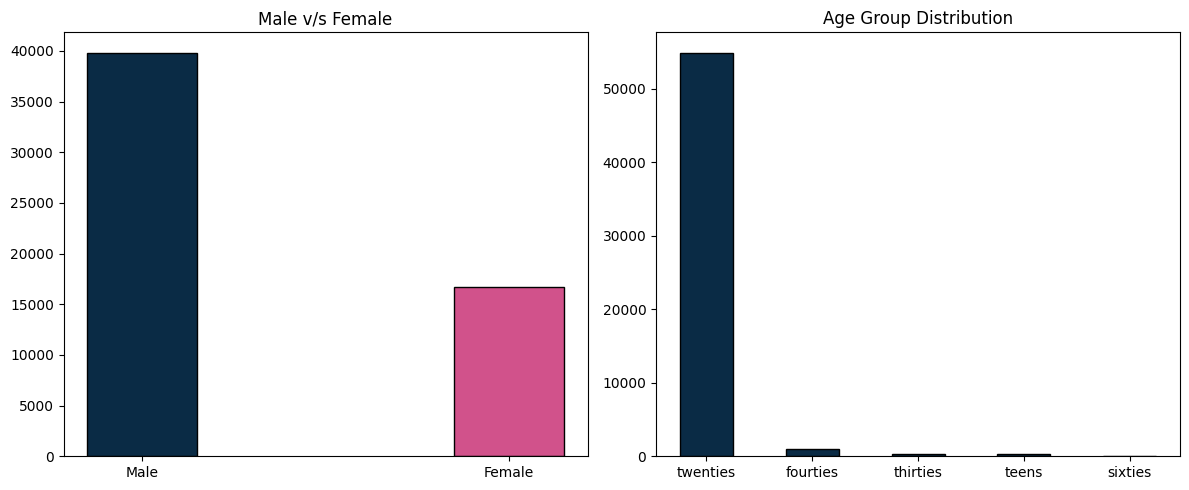

In [82]:
# ------------------------------------------------- plotting the data --------------------------------------------------------- #

# data for plot 1
male_count = df['gender'].value_counts()['male_masculine']
female_count =  df['gender'].value_counts()['female_feminine']
    
# data for plot 2
age_group_count = df['age'].value_counts()
# print(age_group_count)

# plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].bar(['Male', 'Female'], [male_count, female_count], width=0.3, edgecolor='black', color=['#0a2b45', '#d1528b'])
axes[0].set_title('Male v/s Female')

axes[1].bar(age_group_count.index, age_group_count.values, width=0.5, edgecolor='black', color=['#0a2b45', '#0a2b45'])
axes[1].set_title('Age Group Distribution')

plt.tight_layout() # prevent overlapp
plt.show()

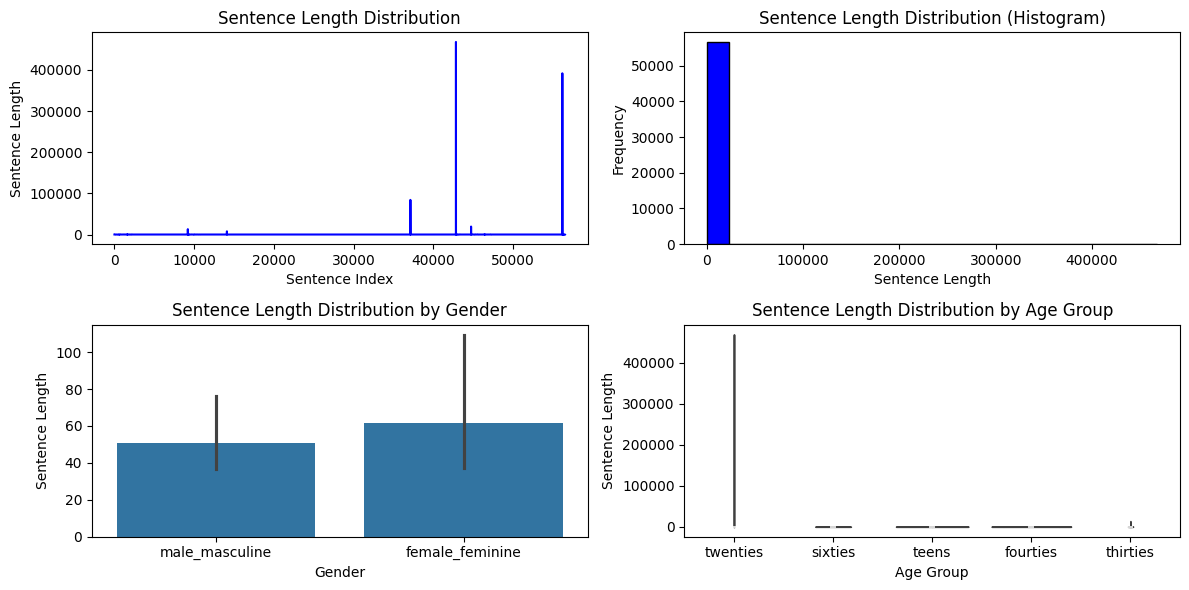

In [83]:
# sentence length distribution in characters and plotting

#length of characters of each sentence
df['sentence_length'] = df['sentence'].apply(len)
# print(df['sentence_length'].describe())

gender_group = df.groupby("gender")['sentence_length']
# gender_group.describe()
age_grouped = df.groupby("age")['sentence_length']
# age_grouped.describe()

# plotting
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

axes[0,0].plot(df['sentence_length'], color='blue')
axes[0,0].set_title('Sentence Length Distribution')
axes[0,0].set_xlabel('Sentence Index')
axes[0,0].set_ylabel('Sentence Length')

axes[0,1].hist(df['sentence_length'], bins=20, color='blue', edgecolor='black')
axes[0,1].set_title('Sentence Length Distribution (Histogram)')
axes[0,1].set_xlabel('Sentence Length')
axes[0,1].set_ylabel('Frequency')

sns.barplot(data=df, x='gender', y='sentence_length', ax=axes[1,0])
axes[1,0].set_title('Sentence Length Distribution by Gender')
axes[1,0].set_xlabel('Gender')
axes[1,0].set_ylabel('Sentence Length')

sns.violinplot(data=df, x='age', y='sentence_length', ax=axes[1,1])
axes[1,1].set_title('Sentence Length Distribution by Age Group')
axes[1,1].set_xlabel('Age Group')
axes[1,1].set_ylabel('Sentence Length')

plt.tight_layout() # prevent overlapp
plt.show()


count     56496.000000
mean       4278.512319
std        3219.420905
min         360.000000
25%        2988.000000
50%        3960.000000
75%        5076.000000
max      190584.000000
Name: duration, dtype: float64


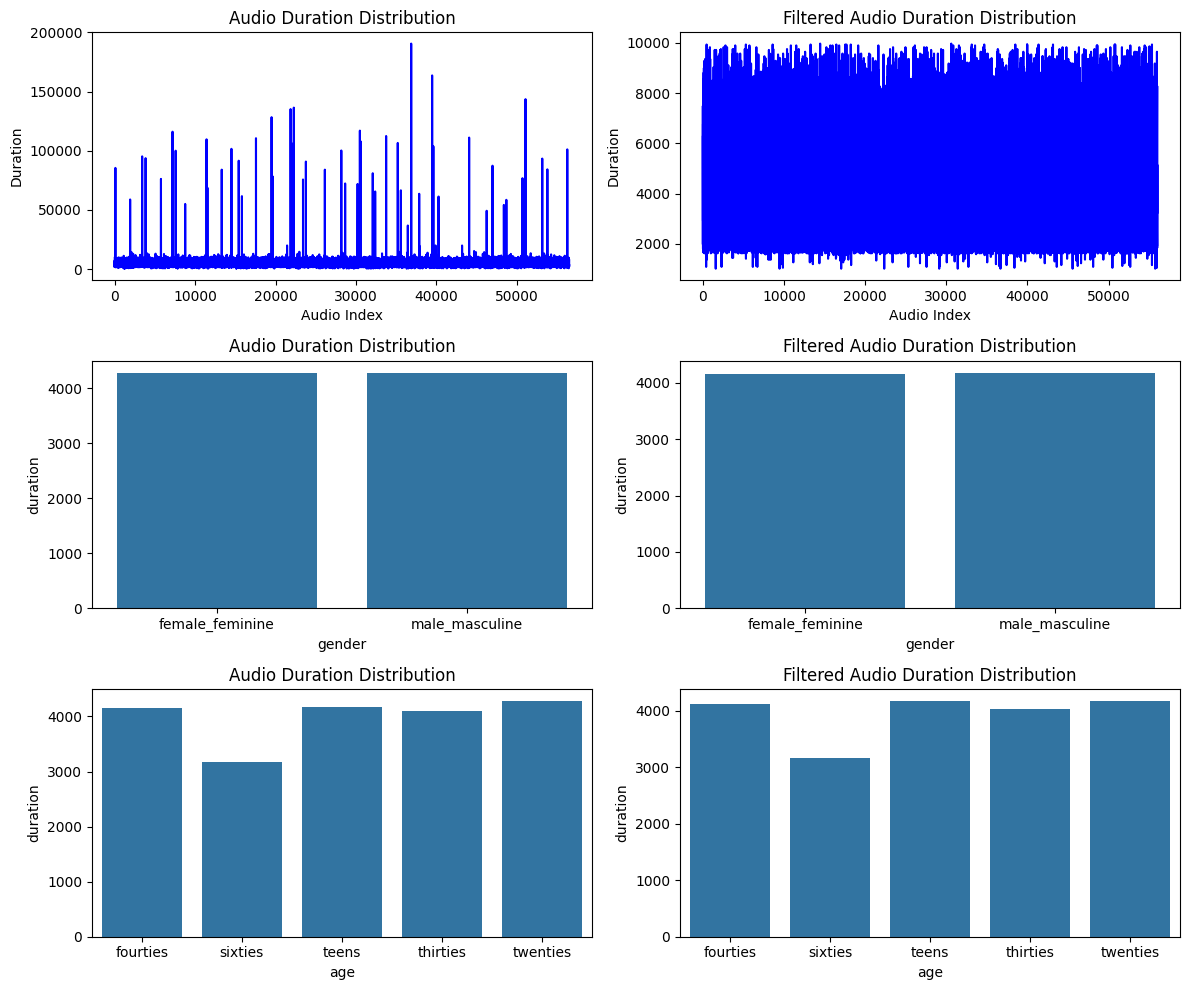

In [84]:
# ---------------------------------------------- Audio Duration ananlysis ------------------------------------------------------ #

# audio duration analysis
duration_file = pd.read_csv('clip_durations.tsv', sep='\t')
df['duration'] = duration_file['duration[ms]']
# df.head()
# print(df[df['duration'].isnull() == True])

# plotting
print(df['duration'].describe())
fig, axes = plt.subplots(3,2, figsize=(12, 5*2))

axes[0,0].plot(df['duration'], color='blue')
axes[0,0].set_title('Audio Duration Distribution')
axes[0,0].set_xlabel('Audio Index')
axes[0,0].set_ylabel('Duration')

filtered_audio = df[df['duration'] < 10000]
filtered_audio = filtered_audio[filtered_audio['duration'] > 1000]
filtered_audio = filtered_audio.reset_index(drop=True)
axes[0,1].plot(filtered_audio['duration'], color='blue')
axes[0,1].set_title('Filtered Audio Duration Distribution')
axes[0,1].set_xlabel('Audio Index')
axes[0,1].set_ylabel('Duration')

gender_grouped_non_filtered = df.groupby("gender")
gender_non_filtered_mean = gender_grouped_non_filtered['duration'].mean()
# print(gender_non_filtered_mean)
gender_grouped_filtered = filtered_audio.groupby('gender')
gender_filtered_mean = gender_grouped_filtered['duration'].mean()
# print(gender_filtered_mean)
sns.barplot(data=gender_non_filtered_mean, ax=axes[1,0])
axes[1,0].set_title('Audio Duration Distribution')
sns.barplot(data=gender_filtered_mean, ax=axes[1,1])
axes[1,1].set_title('Filtered Audio Duration Distribution')

age_grouped_non_filtered = df.groupby("age")
age_non_filtered_mean = age_grouped_non_filtered['duration'].mean()
# print(age_non_filtered_mean)
age_grouped_filtered = filtered_audio.groupby('age')
age_filtered_mean = age_grouped_filtered['duration'].mean()
# print(age_filtered_mean)
sns.barplot(data=age_non_filtered_mean, ax=axes[2,0])
axes[2,0].set_title('Audio Duration Distribution')
sns.barplot(data=age_filtered_mean, ax=axes[2,1])
axes[2,1].set_title('Filtered Audio Duration Distribution')

plt.tight_layout() # prevent overlapp
plt.show()

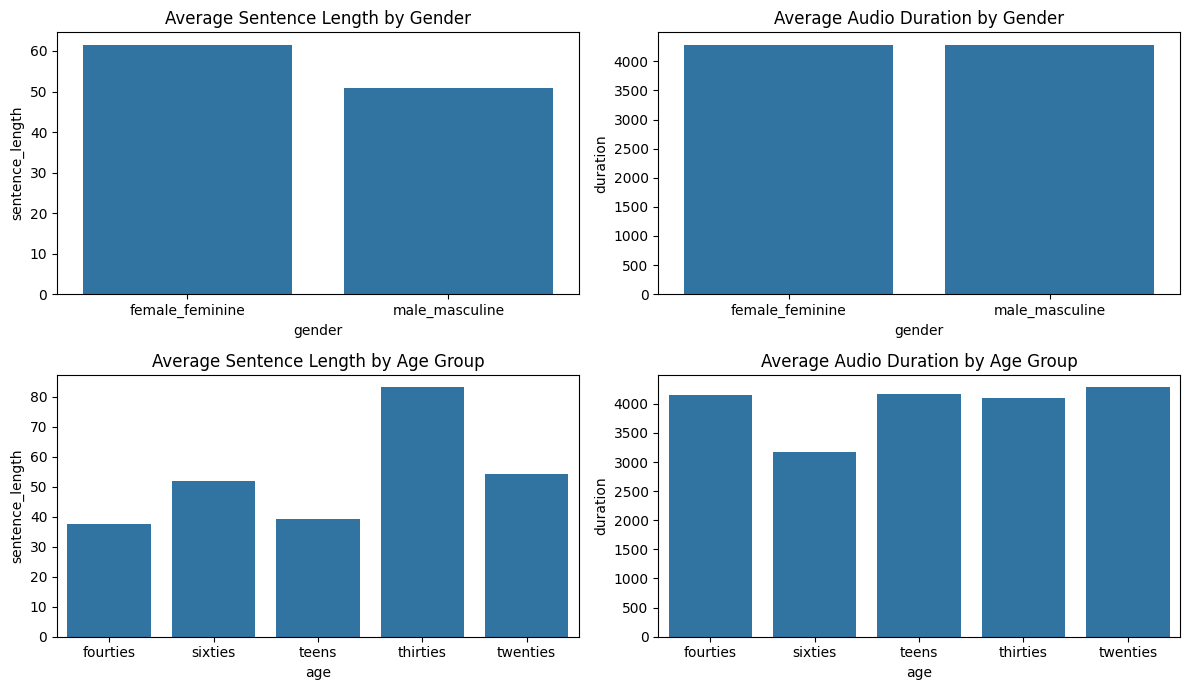

In [85]:
# ------------------------------------------------ Gender and Age Group Comparisons ------------------------------------------- #

gender_grouped = df.groupby('gender')

gender_avg_sentence_length = gender_grouped['sentence_length'].mean()
gender_avg_duration = gender_grouped['duration'].mean()
# print(gender_avg_sentence_length, "\n\n", gender_avg_duration)

age_grouped = df.groupby('age')
age_avg_sentence_length = age_grouped['sentence_length'].mean()
age_avg_duration = age_grouped['duration'].mean()
# print(age_avg_sentence_length, "\n\n", age_avg_duration)

#plotting
fig, axes = plt.subplots(2, 2, figsize=(12, 7))
sns.barplot(data=gender_avg_sentence_length, ax=axes[0,0])
axes[0,0].set_title('Average Sentence Length by Gender')

sns.barplot(data=gender_avg_duration, ax=axes[0,1])
axes[0,1].set_title('Average Audio Duration by Gender')

sns.barplot(data=age_avg_sentence_length, ax=axes[1,0])
axes[1,0].set_title('Average Sentence Length by Age Group')

sns.barplot(data=age_avg_duration, ax=axes[1,1])
axes[1,1].set_title('Average Audio Duration by Age Group')

plt.tight_layout() # prevent overlapp
plt.show()

In [88]:
# --------------------------------------------------------- Summary ----------------------------------------------------------- #

# Summary
"""
male conttributed significantly more than females
age group of twenties contributed the most
sentence length of females is more than males
most of the audio duration is between 1000ms to 10000ms peaking at 20000ms
"""

'\nmale conttributed significantly more than females\nage group of twenties contributed the most\nsentence length of females is more than males\nmost of the audio duration is between 1000ms to 10000ms peaking at 20000ms\n'